<a href="https://colab.research.google.com/github/serhii-korobchenko/-Python_Web_module_2/blob/main/Trajectory_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import os
drive.mount('/content/drive')

%cd /content/drive/MyDrive/data/geo_data

Mounted at /content/drive
/content/drive/MyDrive/data/geo_data


## Installing and Importing GeoPandas

Before we begin, make sure you have geopandas installed. You can install it using:

In [ ]:
%pip install geopandas

Once installed, import GeoPandas and other necessary libraries:

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

You can also explore your data interactively using `GeoDataFrame.explore()`, which behaves in the same way `plot()` does but returns an interactive map instead.

In [ ]:
!pip install folium
!pip install matplotlib
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 10.7 MB/s eta 0:00:00


In [ ]:
!pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 34.1 MB/s eta 0:00:00


`Loading layers content for chousen area from a pkl file (optional)`

In [ ]:
# Load dictionary from .pkl file
import pickle

# Load from pickle file
with open('Pokrovsk_with_new_obj.pkl', 'rb') as f:
    clipped_layers = pickle.load(f)

In [ ]:
!pip install folium

In [ ]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 37.5 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib_scalebar

# Trajectory analisys

In [ ]:
!pip install movingpandas
!pip install hvplot
!pip install geoviews

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.3/547.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 71.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import shapely as shp
import hvplot.pandas

from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
from holoviews import opts

import warnings

warnings.filterwarnings("ignore")

opts.defaults(
    opts.Overlay(active_tools=["wheel_zoom"], frame_width=500, frame_height=400)
)

mpd.show_versions()

/usr/local/lib/python3.11/dist-packages/movingpandas/__init__.py:41: UserWarning: Missing optional dependencies. To use the trajectory smoother classes please install Stone Soup (see https://stonesoup.readthedocs.io/en/latest/#installation).
  warnings.warn(e.msg, UserWarning)



MovingPandas 0.22.4

SYSTEM INFO
-----------
python     : 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
executable : /usr/bin/python3
machine    : Linux-6.1.123+-x86_64-with-glibc2.35

PROJ INFO
-----------
PROJ       : 9.5.1
PROJ data dir: /usr/local/lib/python3.11/dist-packages/pyproj/proj_dir/share/proj

PYTHON DEPENDENCIES
-------------------
numpy      : 2.0.2
geopandas  : 1.0.1
geopy      : 2.4.1
geoviews   : 1.14.0
holoviews  : 1.21.0
hvplot     : 0.11.3
mapclassify: 2.10.0
matplotlib : 3.10.0
pandas     : 2.2.2
pyproj     : 3.7.1
shapely    : 2.1.1
stonesoup  : None


In [ ]:
# === VISUALIZATION === WITH ===== EXPLORE  ====== + TRAJECTORY

from shapely.geometry import box
import geopandas as gpd
import folium
from folium.plugins import Draw
import itertools

from shapely.geometry import box

xmin, ymin = 37.11705207824708, 48.30380760112452  # lower-left corner (longitude, latitude) 48.30380760112452, 37.11705207824708
xmax, ymax = xmin + 0.1, ymin + 0.1  # approx. 20 km in both directions
rect = box(xmin, ymin, xmax, ymax)



def layers_interactive_vizualizaton_func_with_trajectory(def_castom_layers, clipped_layers=clipped_layers, trajectory=None):
    """
    Visualizes multiple GeoDataFrame layers and an optional movingpandas Trajectory object on an interactive map.

    Parameters:
        def_castom_layers (list): Names of layers to visualize from clipped_layers.
        clipped_layers (dict): Dictionary of GeoDataFrames.
        trajectory (movingpandas.Trajectory, optional): Trajectory to visualize.

    Returns:
        folium.Map: Interactive map with all specified layers.
    """
    rect_gdf = gpd.GeoDataFrame(geometry=[rect], crs="EPSG:4326")

    # Cycle of distinct colors
    colors = itertools.cycle([
        "red", "green", "blue", "purple", "orange", "darkred",
        "cadetblue", "black", "pink", "gray", "lightgreen"
    ])

    # Initialize map with first layer
    first_layer_name = def_castom_layers[0]
    first_color = next(colors)
    m = clipped_layers[first_layer_name].explore(
        name=first_layer_name,
        legend=False,
        style_kwds={"fillOpacity": 1, "color": first_color, "weight": 10}
    )

    # Add additional layers
    for layer_name in def_castom_layers[1:]:
        layer_color = next(colors)
        clipped_layers[layer_name].explore(
            name=layer_name,
            legend=False,
            style_kwds={"fillOpacity": 0.5, "color": layer_color},
            m=m
        )

    # Add bounding box
    rect_gdf.explore(
        name="Bounding Box",
        m=m,
        style_kwds={"color": "black", "fill": False, "weight": 1}
    )

    # Add trajectory if present
    if trajectory is not None:

        trajectory.explore(
            name="Trajectory",
            m=m,
            style_kwds={"color": "blue", "weight": 1}
        )

    # Add controls and drawing tools
    folium.LayerControl().add_to(m)
    Draw(export=True, filename='drawn_route.geojson').add_to(m)

    return m


# **Конфігурація 1 інженерних засобів**
ТТХ:

- середня швидкість - 30 км/год.

Sзас_розм = 10

In [ ]:
# Load tragectory points from .pkl file
import pickle

# Load from pickle file
with open('Route2_gdf.pkl', 'rb') as f:
    trajectory_points = pickle.load(f)

In [ ]:
import geopandas as gpd
from shapely.geometry import LineString, Point
import numpy as np

def densify_trajectory(gdf_points, distance_meters=50):
    """
    Given a GeoDataFrame of points ordered along a trajectory,
    return a new GeoDataFrame with added points so that the distance
    between consecutive points is approximately `distance_meters`.

    Parameters:
    - gdf_points: GeoDataFrame with Point geometries in order
    - distance_meters: float, desired distance between points

    Returns:
    - GeoDataFrame with densified points
    """
    # Ensure projection in meters
    gdf_points_m = gdf_points.to_crs(epsg=3857)

    # Create full LineString from points
    full_line = LineString(gdf_points_m.geometry.tolist())
    total_length = full_line.length

    # Create new points along the line
    num_segments = int(np.floor(total_length / distance_meters))
    distances = np.linspace(0, total_length, num_segments + 1)

    new_points = [full_line.interpolate(d) for d in distances]

    # Return to original CRS
    gdf_new = gpd.GeoDataFrame(geometry=new_points, crs=gdf_points_m.crs)
    gdf_new = gdf_new.to_crs(gdf_points.crs)

    return gdf_new


<Axes: >

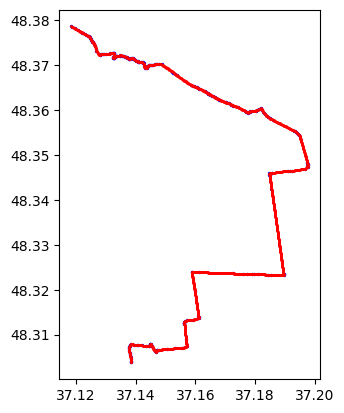

In [ ]:
# Assuming your original GeoDataFrame is `gdf`
gdf_dense = densify_trajectory(trajectory_points, distance_meters=25)

# Optional: plot to verify
trajectory_points.plot(color='blue', markersize=2)
gdf_dense.plot(color='red', markersize=1, ax=plt.gca())


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from itertools import combinations
import matplotlib.pyplot as plt

def find_overlapping_points(trajectory_points, polygon_gdf, polygon_filter_column='name', polygon_filter_value=None, predicate='within', buffer_distance=20):
    """
    Find two most distant trajectory points that overlap with specified polygons.

    Parameters:
        trajectory_points (GeoDataFrame): GeoDataFrame containing point geometries of the trajectory.
        polygon_gdf (GeoDataFrame): GeoDataFrame containing polygon geometries.
        polygon_filter_column (str, optional): Column to filter the polygons by (e.g., 'fclass').
        polygon_filter_value (str, optional): Value to match in the filter column (e.g., 'bridge').
        predicate (str): Spatial predicate to use ('within', 'intersects', etc.).
        buffer_distance (float): Distance in meters to buffer the polygon geometries.

    Returns:
        GeoDataFrame: Two most distant overlapping trajectory points.
    """
    # Optional filtering of polygons
    if polygon_filter_column and polygon_filter_value:
        polygon_gdf = polygon_gdf.query(f"{polygon_filter_column} == '{polygon_filter_value}'")

    # Align CRS
    points_gdf = trajectory_points.to_crs(epsg=3857)
    polygon_gdf = polygon_gdf.to_crs(points_gdf.crs)

    # Optional buffering
    if buffer_distance != 0:
        polygon_gdf['geometry'] = polygon_gdf.geometry.buffer(buffer_distance)

    # Perform spatial join to find overlapping points
    overlapping_points = gpd.sjoin(points_gdf, polygon_gdf, how='inner', predicate=predicate)

    # If fewer than 2 overlapping points, return as is
    if len(overlapping_points) < 2:
        return overlapping_points

    # Find the pair of points with the maximum distance
    max_dist = -1
    point_pair = (None, None)

    for idx1, idx2 in combinations(overlapping_points.index, 2):
        p1 = overlapping_points.loc[idx1].geometry
        p2 = overlapping_points.loc[idx2].geometry
        dist = p1.distance(p2)
        if dist > max_dist:
            max_dist = dist
            point_pair = (idx1, idx2)

    # Extract the two most distant points
    result = overlapping_points.loc[list(point_pair)]

    # Optional visualization
    fig, ax = plt.subplots()
    polygon_gdf.plot(ax=ax, facecolor='lightblue', edgecolor='blue')
    points_gdf.plot(ax=ax, color='gray', markersize=5)
    result.plot(ax=ax, color='red', markersize=30)
    plt.show()

    return result


In [ ]:
gdf_dense

,geometry
0,POINT (37.11841 48.37859)
1,POINT (37.11861 48.37852)
2,POINT (37.11881 48.37845)
3,POINT (37.11901 48.37838)
4,POINT (37.11921 48.37831)
...,...
1063,POINT (37.1384 48.30439)
1064,POINT (37.13842 48.30424)
1065,POINT (37.13846 48.3041)
1066,POINT (37.13851 48.30395)


In [ ]:
clipped_layers['castom_layer']

,osm_id,code,fclass,name,type,geometry,Mobj
0,None,1500,bridge,new_bridge,None,"POLYGON ((37.13793 48.30634, 37.13793 48.30631...",200000
1,None,1500,crossing,river_crossing,None,"POLYGON ((37.17808 48.35953, 37.17808 48.35949...",200000
2,None,1500,road,road_mined,None,"POLYGON ((37.18547 48.3424, 37.18568 48.34139,...",100000


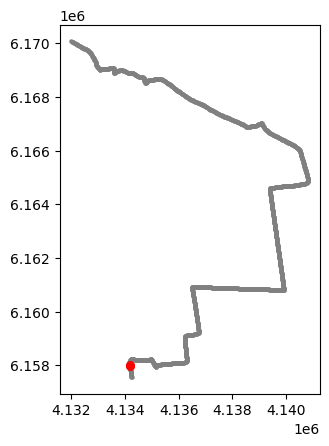

,geometry,index_right,osm_id,code,fclass,name,type,Mobj
1049,POINT (4134170.183 6157989.327),0,None,1500,bridge,new_bridge,None,200000
1050,POINT (4134172.839 6157964.456),0,None,1500,bridge,new_bridge,None,200000


In [ ]:
# Overlapping points for bridge
bridge_points = find_overlapping_points(
    trajectory_points=gdf_dense,
    polygon_gdf=clipped_layers['castom_layer'],
    polygon_filter_value='new_bridge',
    predicate='intersects'
)
bridge_points

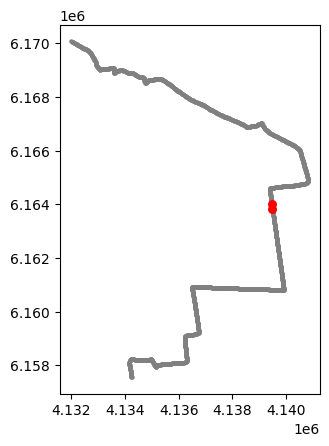

,geometry,index_right,osm_id,code,fclass,name,type,Mobj
548,POINT (4139469.939 6164007.272),2,None,1500,road,road_mined,None,100000
555,POINT (4139494.45 6163833.91),2,None,1500,road,road_mined,None,100000


In [ ]:
# Overlapping points for road_mined
road_points = find_overlapping_points(
    trajectory_points=gdf_dense,
    polygon_gdf=clipped_layers['castom_layer'],
    polygon_filter_value='road_mined',
    predicate='intersects'

)
road_points

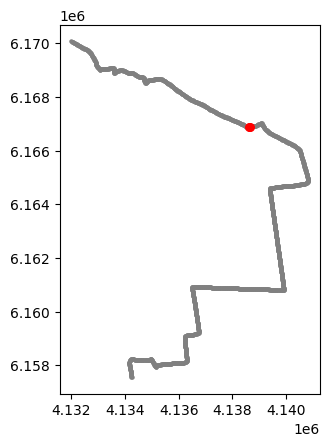

,geometry,index_right,osm_id,code,fclass,name,type,Mobj
325,POINT (4138624.431 6166863.556),1,None,1500,crossing,river_crossing,None,200000
326,POINT (4138644.331 6166875.211),1,None,1500,crossing,river_crossing,None,200000


In [ ]:
# Overlapping points for river_crossing
river_points = find_overlapping_points(
    trajectory_points=gdf_dense,
    polygon_gdf=clipped_layers['castom_layer'],
    polygon_filter_value='river_crossing',
    predicate='intersects'
)
river_points

**CREATING TRAJECTORY**

In [ ]:
import geopandas as gpd
from datetime import datetime, timedelta
import movingpandas as mpd

def create_trajectory_with_avg_speed(gdf, avg_speed_kmph=30, start_time=datetime(2025, 7, 1, 9, 0, 0), traj_id="traj"):
    """
    Create a movingpandas.Trajectory by assigning timestamps based on constant average speed.

    Parameters:
        gdf (GeoDataFrame): Input GeoDataFrame with ordered Point geometries (no time info).
        avg_speed_kmph (float): Average speed in kilometers per hour.
        start_time (datetime): Starting timestamp.
        traj_id (str): Trajectory ID for labeling.

    Returns:
        mpd.Trajectory: Trajectory with timestamps assigned based on average speed.
    """
    # Convert km/h to m/s
    avg_speed_mps = avg_speed_kmph / 3.6

    # Project to meters (Web Mercator)
    gdf = gdf.to_crs(epsg=3857).copy()

    # Compute distances between consecutive points
    gdf['distance_m'] = gdf.geometry.distance(gdf.geometry.shift()).fillna(0)

    # Calculate seconds for each segment ----- > Insert formula here
    gdf['seconds'] = gdf['distance_m'] / avg_speed_mps
    gdf['seconds'] = gdf['seconds'].fillna(0)

    # Cumulative seconds and assign timestamps
    gdf['cum_seconds'] = gdf['seconds'].cumsum()
    gdf['t'] = gdf['cum_seconds'].apply(lambda x: start_time + timedelta(seconds=x))

    # Add traj_id column and set time index
    gdf['traj_id'] = traj_id
    gdf.set_index('t', inplace=True)

    # Create and return trajectory
    return mpd.Trajectory(gdf, traj_id=traj_id)


In [ ]:
trajectory_conf1 = create_trajectory_with_avg_speed(gdf_dense, avg_speed_kmph=30, traj_id="constant_speed_traj_30kmph")


In [ ]:
trajectory_conf1.add_speed(overwrite=True, units=("km", "h"))
trajectory_conf1.df

,geometry,distance_m,seconds,cum_seconds,traj_id,speed
t,,,,,,
2025-07-01 09:00:00.000000,POINT (4132002.868 6170071.71),0.000000,0.000000,0.000000,constant_speed_traj_30kmph,29.999997
2025-07-01 09:00:03.001481,POINT (4132025.099 6170060.247),25.012340,3.001481,3.001481,constant_speed_traj_30kmph,29.999997
2025-07-01 09:00:06.002961,POINT (4132047.33 6170048.784),25.012340,3.001481,6.002961,constant_speed_traj_30kmph,30.000007
2025-07-01 09:00:09.004430,POINT (4132069.404 6170037.022),25.012234,3.001468,9.004430,constant_speed_traj_30kmph,29.999991
2025-07-01 09:00:12.005910,POINT (4132091.471 6170025.246),25.012340,3.001481,12.005910,constant_speed_traj_30kmph,30.000007
...,...,...,...,...,...,...
2025-07-01 09:52:59.613245,POINT (4134227.323 6157645.225),25.012340,3.001481,3179.613245,constant_speed_traj_30kmph,30.000007
2025-07-01 09:53:02.614726,POINT (4134229.674 6157620.323),25.012340,3.001481,3182.614726,constant_speed_traj_30kmph,29.999997
2025-07-01 09:53:05.614782,POINT (4134234.634 6157595.82),25.000465,3.000056,3185.614782,constant_speed_traj_30kmph,29.999997


<Axes: xlabel='t'>

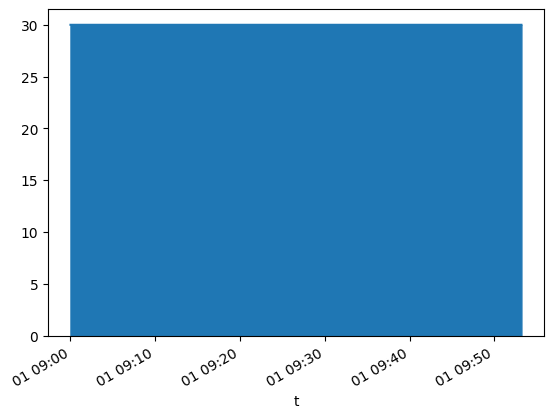

In [ ]:
# Speed distribution
trajectory_conf1.df.speed.plot.area()

In [ ]:
castom_layers = ['castom_layer'] # new layer
layers_interactive_vizualizaton_func_with_trajectory(castom_layers, trajectory = trajectory_conf1)